In this notebook we'll use localpdb to analyze the amino acid preferences in the viral coiled-coil domains.

#### Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from localpdb import PDB

#### Initiate localpdb and load Socket data

In [5]:
lpdb = PDB('/ssd/db/localpdb', plugins=['Socket'])

#### Search for viral proteins with RCSB search API wrapper

In [6]:
lpdb.search(attribute='struct_keywords.pdbx_keywords', operator='contains_phrase', 
            value='VIRAL PROTEIN', no_hits=-1, select=True)

#### Select only entries than contain coiled-coil domain

In [7]:
lpdb.entries = lpdb.entries[lpdb.entries['socket_7.0'].notnull()]

#### Select X-ray entries of reasonable quality

In [8]:
lpdb.entries = lpdb.entries.query('method == "diffraction"')
lpdb.entries = lpdb.entries.query('resolution <= 2.0')

#### Get Socket data for selected entries

In [9]:
socket = lpdb.get_socket_dict(method='heptads')

#### Iterate over entries and collect per-residue statistics

In [13]:
stats = {pos: {aa: 0 for aa in 'AILVCDEFGHKMNPQRSTWYX'} for pos in 'abcdefg'}

# Iterate over all coiled-coil domains and compute stats
for entry, ccs in socket.items():
    for cc in ccs.values():
        for seq, hept_register in zip(cc['sequences'].values(), cc['heptads'].values()):
            for aa, hept in zip(seq, hept_register):
                stats[hept][aa] += 1

#### Plot residue preferences among heptad positions

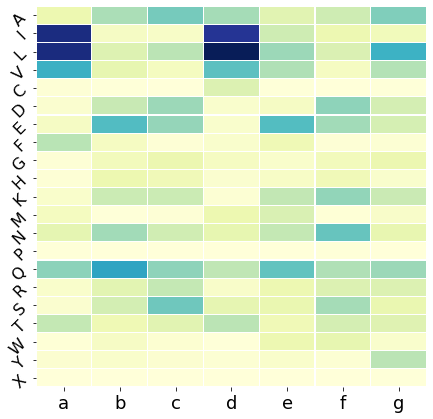

In [23]:
df = pd.DataFrame.from_dict(stats)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(df, cmap='YlGnBu', cbar=False, linewidths=.1)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 16, rotation=45);